In [118]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [309]:
# sample n points uniformly from first orthant of the unit d-ball
def unif_ball_orthant(n=1, d=1):
    count = 0
    sample_list = []
    while(count < n):
        y = np.random.uniform(size=d)
        if np.linalg.norm(y, ord=2) <= 1:
            sample_list.append(y)
            count = count + 1
        
    x = np.array(sample_list)
    
    return x

# get probability matrix
def get_prob_mat(x):
    p = x @ x.transpose()
    
    return p

# sample adjacency matrix
def sample_adj_mat(p):
    n = p.shape[0]
    ind = np.triu_indices(n, k=1)
    a_vals = np.random.binomial(1, p[ind])
    a = np.zeros((n,n))
    a[ind] = a_vals
    a = a.transpose()
    a[ind] = a_vals
    
    return a

# get spectral decomposition of self-adjoint M with eigenvals decreasing
def get_sd(M):
    lam, u = np.linalg.eig(M)
    ind = np.argsort(lam)[::-1]
    lam = lam[ind]
    u = u[:, ind]
    
    return lam, u
    

# get singular value decomposition of M with singular vals decreasing 
def get_svd(m, compute_uv=True):
    if compute_uv == True:
        u, s, vt = np.linalg.svd(m)
        ind = np.argsort(s)[::-1]
        u = u[:, ind]
        s = s[ind]
        vt = vt[ind, :]
    
        return u, s, vt
    else:
        s = np.linalg.svd(m, compute_uv=False)
        ind = np.argsort(s)[::-1]
        s = s[ind]
        
        return s

# calculate delta(M)
def get_delta(m):
    row_sums = np.sum(m, axis=1)
    max_row_sum = np.max(row_sums)
    
    return max_row_sum


# calculate gamma(M, d) with d in [0, ..., min(m,n) - 1] where m, n are the number of rows, cols 
def get_gamma(m, d):
    s = get_svd(m, compute_uv=False)
    assert d < len(s) - 1
    sd = s[d]
    sdp = s[d+1]
    delta = get_delta(m)
    gamma = (sd - sdp) / delta
    
    return gamma
    
# get argmin of orthogonal matrix procrustes problem: find orthogonal w s.t. |xw - y| is minimal
def get_opt_translate(x, y):
    u, s, vt = get_svd(x.transpose() @ y)
    w = u @ vt 
    
    return w

# get adjacency spectral embedding
def get_adj_spec_emb(a, d):
    a_sq = a.transpose() @ a
    lam_sq, u = get_sd(a_sq)
    
    lam_hat = (lam_sq[:d])**(1/4)
    u_hat = u[:, :d]
    x_hat = u_hat @ np.diag(lam_hat)
    
    return x_hat

def get_test_stat(a, b, d):
    x_hat = get_adj_spec_emb(a, d)
    y_hat = get_adj_spec_emb(b, d)
    w = get_opt_translate(x_hat, y_hat)
    
    gam_a = get_gamma(a, d)
    gam_b = get_gamma(b, d)
    sa = np.sqrt(d / gam_a)
    sb = np.sqrt(d / gam_b)
    
    num = np.linalg.norm(x_hat @ w - y, ord='fro')
    denom = sa + sb
    
    t = num / denom
    
    return t

In [307]:
n = 1000
d = 7

x = unif_ball_orthant(n, d)
y = unif_ball_orthant(n, d)

In [308]:
p = get_prob_mat(x)
q = get_prob_mat(y)

a = sample_adj_mat(p)
b = sample_adj_mat(q)

t = get_test_stat(a, b, d)
t

#w = get_opt_translate(x, x_hat)
#np.linalg.norm(x @ w- x_hat, ord='fro')


#g = nx.convert_matrix.from_numpy_matrix(a)
#figure(figsize=(15,15))
#nx.draw(g)
#t = nx.triangles(g)
#sum(t.values()) / 3


0.11359542684148405

In [208]:
x.shape
x_hat.shape
(x.transpose() @ x_hat).shape
np.diag(x)

(100, 9)

(100, 9)

(9, 9)

array([0.31536899, 0.46250601, 0.25018791, 0.09165838, 0.06012742,
       0.39558104, 0.25986535, 0.53341196, 0.10769858])

In [179]:
u @ np.diag(s) @ vt
x.transpose() @ x_hat
u.transpose() @ u

array([[ 1.82918584,  0.35147658,  0.19117917],
       [ 2.73343769,  0.104757  , -0.48426979],
       [ 1.97187751, -0.05905019,  0.34257151]])

array([[ 1.82918584,  0.35147658,  0.19117917],
       [ 2.73343769,  0.104757  , -0.48426979],
       [ 1.97187751, -0.05905019,  0.34257151]])

array([[ 1.00000000e+00,  5.55111512e-17,  1.66533454e-16],
       [ 5.55111512e-17,  1.00000000e+00, -1.11022302e-16],
       [ 1.66533454e-16, -1.11022302e-16,  1.00000000e+00]])

In [220]:
u, s, vt = np.linalg.svd(x.transpose() @ x_hat)
w = u @ vt 
w
i = w.transpose() @ w
i 

np.linalg.norm(u.transpose() @ vt, ord='fro')



array([[ 0.49042437,  0.76001995, -0.42644297],
       [ 0.65604128, -0.64407422, -0.39341865],
       [ 0.57366695,  0.0868221 ,  0.81447416]])

array([[ 1.00000000e+00, -2.63677968e-16,  5.55111512e-17],
       [-2.63677968e-16,  1.00000000e+00, -5.55111512e-17],
       [ 5.55111512e-17, -5.55111512e-17,  1.00000000e+00]])

1.732050807568877

In [172]:
v, u = np.linalg.eig(p)

ind = np.argsort(v)
ind
ind = ind[::-1]
ind
v 
u

v = v[ind]
u = u[:, ind]

v
u 

np.diag(v)

array([4, 5, 7, 6, 9, 8, 3, 2, 1, 0])

array([0, 1, 2, 3, 8, 9, 6, 7, 5, 4])

array([ 4.42531247e+00+0.00000000e+00j,  8.63026826e-01+0.00000000e+00j,
        5.20641396e-01+0.00000000e+00j,  2.22147984e-16+0.00000000e+00j,
       -2.87857896e-16+0.00000000e+00j, -1.67515681e-16+0.00000000e+00j,
       -7.00532190e-19+1.14332417e-16j, -7.00532190e-19-1.14332417e-16j,
        6.52090764e-18+1.07317429e-17j,  6.52090764e-18-1.07317429e-17j])

array([[ 0.32285959+0.j        ,  0.34310634+0.j        ,
        -0.32095261+0.j        , -0.27736531+0.j        ,
         0.60462453+0.j        ,  0.12768997+0.j        ,
         0.12414254-0.08255537j,  0.12414254+0.08255537j,
        -0.05383839-0.0523646j , -0.05383839+0.0523646j ],
       [ 0.29539803+0.j        , -0.40862745+0.j        ,
         0.04088948+0.j        , -0.47248834+0.j        ,
        -0.16535047+0.j        ,  0.21858835+0.j        ,
         0.07911668+0.31524105j,  0.07911668-0.31524105j,
        -0.00520091-0.03647014j, -0.00520091+0.03647014j],
       [ 0.3600579 +0.j        ,  0.39833293+0.j        ,
        -0.24987804+0.j        ,  0.21083402+0.j        ,
        -0.54347747+0.j        ,  0.15601545+0.j        ,
        -0.01877207+0.00928169j, -0.01877207-0.00928169j,
        -0.05909293-0.10707601j, -0.05909293+0.10707601j],
       [ 0.37608424+0.j        , -0.10047269+0.j        ,
         0.32232466+0.j        ,  0.01169234+0.j        ,
        -0.

array([ 4.42531247e+00+0.00000000e+00j,  8.63026826e-01+0.00000000e+00j,
        5.20641396e-01+0.00000000e+00j,  2.22147984e-16+0.00000000e+00j,
        6.52090764e-18+1.07317429e-17j,  6.52090764e-18-1.07317429e-17j,
       -7.00532190e-19+1.14332417e-16j, -7.00532190e-19-1.14332417e-16j,
       -1.67515681e-16+0.00000000e+00j, -2.87857896e-16+0.00000000e+00j])

array([[ 0.32285959+0.j        ,  0.34310634+0.j        ,
        -0.32095261+0.j        , -0.27736531+0.j        ,
        -0.05383839-0.0523646j , -0.05383839+0.0523646j ,
         0.12414254-0.08255537j,  0.12414254+0.08255537j,
         0.12768997+0.j        ,  0.60462453+0.j        ],
       [ 0.29539803+0.j        , -0.40862745+0.j        ,
         0.04088948+0.j        , -0.47248834+0.j        ,
        -0.00520091-0.03647014j, -0.00520091+0.03647014j,
         0.07911668+0.31524105j,  0.07911668-0.31524105j,
         0.21858835+0.j        , -0.16535047+0.j        ],
       [ 0.3600579 +0.j        ,  0.39833293+0.j        ,
        -0.24987804+0.j        ,  0.21083402+0.j        ,
        -0.05909293-0.10707601j, -0.05909293+0.10707601j,
        -0.01877207+0.00928169j, -0.01877207-0.00928169j,
         0.15601545+0.j        , -0.54347747+0.j        ],
       [ 0.37608424+0.j        , -0.10047269+0.j        ,
         0.32232466+0.j        ,  0.01169234+0.j        ,
        -0.

array([[ 4.42531247e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  8.63026826e-01+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         5.20641396e-01+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+

<Figure size 1080x1080 with 0 Axes>

2816.0

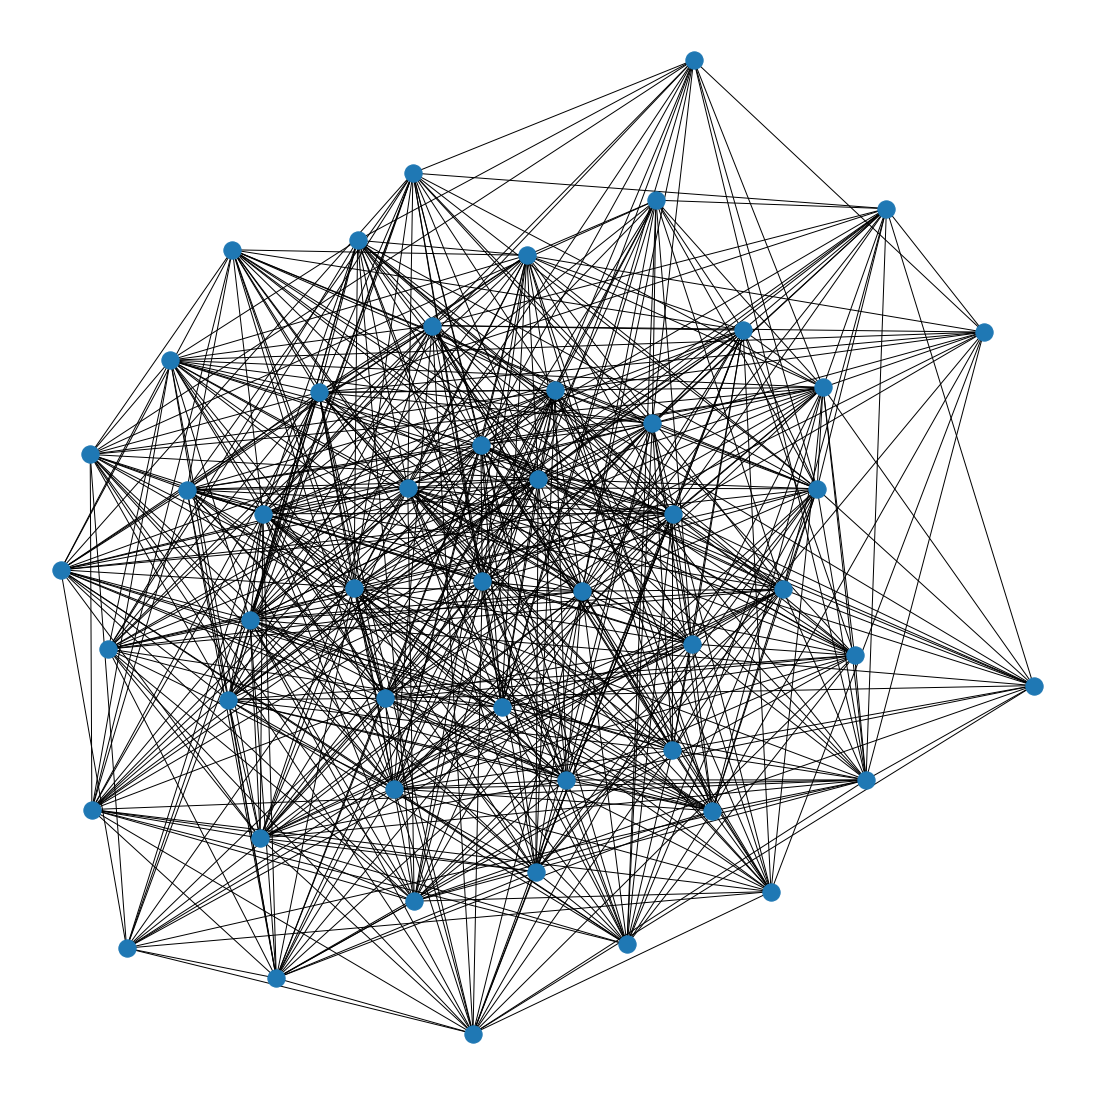

In [121]:

g = nx.convert_matrix.from_numpy_matrix(a)
figure(figsize=(15,15))
nx.draw(g)
t = nx.triangles(g)
sum(t.values()) / 3

In [115]:
np.mean(np.sum(a, axis=0))

25.28

In [103]:
x
p
a

array([[0.24438235, 0.57510225],
       [0.02616659, 0.61882399],
       [0.38239777, 0.35766112],
       [0.80211792, 0.48295472],
       [0.39248683, 0.5765959 ]])

array([[0.39046533, 0.36228172, 0.29914297, 0.47377181, 0.42751845],
       [0.36228172, 0.38362782, 0.23133532, 0.31985266, 0.36708142],
       [0.29914297, 0.23133532, 0.27414953, 0.47946223, 0.35631202],
       [0.47377181, 0.31985266, 0.47946223, 0.87663842, 0.59329044],
       [0.42751845, 0.36708142, 0.35631202, 0.59329044, 0.48650875]])

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [89]:
a = np.zeros((n,n))
a[ind] = a_vals
a
a = np.transpose(a)
a
a[ind] = a_vals
a

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [30]:
arr = unif_ball_orthant(dim=2, size=10000)

In [14]:
x = np.random.uniform(size=2)
y = np.random.uniform(size=2)

In [44]:
x
y

array([0.82756583, 0.14826286])

array([0.71143459, 0.95801931])

In [45]:
arr = np.array([x, y])

In [46]:
arr

array([[0.82756583, 0.14826286],
       [0.71143459, 0.95801931]])

In [47]:
np.transpose(arr)

array([[0.82756583, 0.71143459],
       [0.14826286, 0.95801931]])

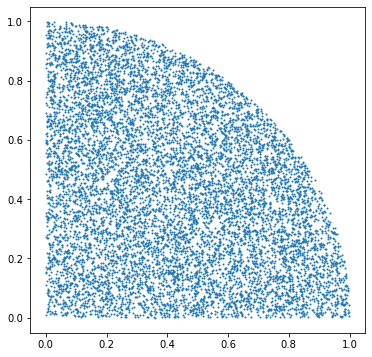

In [39]:
plt.subplots(figsize=(6, 6))
plt.scatter(arr[:, 0], arr[:, 1], s=1)

In [132]:
l = list(range(1,5))

In [133]:
l

[1, 2, 3, 4]

In [134]:
l[-1]

4

In [136]:
l[-3::]

[3, 4]